In [7]:
import pandas as pd

all_games_df = pd.read_csv("data/all_games.csv")

# Data Preparation

In [8]:
from api_helpers.game_stats_helpers import load_past_n_games

columns = ["FG_PCT", "FG3_PCT", "FTM", "OREB", "DREB", "REB", "AST"]
columns_a = [column + "_A" for column in columns]
columns_b = [column + "_B" for column in columns]

n_games_df = load_past_n_games(all_games_df=all_games_df, columns=columns)
n_games_df = n_games_df.dropna()

In [9]:
n_games_df["WL_A"].replace("L", 0, inplace=True)
n_games_df["WL_A"].replace("W", 1, inplace=True)
n_games_df = n_games_df[(n_games_df["WL_A"] == 1) | (n_games_df["WL_A"] == 0)]
n_games_df

/tmp/ipykernel_486561/4085731177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_games_df["WL_A"].replace("L", 0, inplace=True)
/tmp/ipykernel_486561/4085731177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,GAME_ID,TEAM_ID_A,TEAM_ID_B,GAME_ID,WL_A,FG_PCT_A,FG3_PCT_A,FTM_A,OREB_A,DREB_A,REB_A,AST_A,FG_PCT_B,FG3_PCT_B,FTM_B,OREB_B,DREB_B,REB_B,AST_B
0,22301159,1610612737,1610612766,22301159,0,0.524000,0.450000,10.000000,7.00,31.000000,38.000000,35.00,0.5060,0.3890,21.0,5.0,28.0,33.0,25.0
1,22301147,1610612737,1610612748,22301147,0,0.524000,0.450000,10.000000,7.00,31.000000,38.000000,35.00,0.4770,0.4000,15.0,5.0,41.0,46.0,29.0
2,22301104,1610612737,1610612765,22301104,1,0.461000,0.333500,10.500000,12.00,36.500000,48.500000,31.50,0.4570,0.3330,17.0,8.0,29.0,37.0,24.0
3,22301076,1610612737,1610612749,22301076,0,0.488667,0.336333,10.333333,10.00,38.333333,48.333333,33.00,0.5510,0.2860,28.0,6.0,34.0,40.0,27.0
4,22301060,1610612737,1610612738,22301060,1,0.480750,0.352250,11.500000,9.75,36.250000,46.000000,30.75,0.4790,0.3890,18.0,9.0,34.0,43.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52802,28800140,1610612766,1610612764,28800140,0,0.473400,0.216600,18.000000,12.80,32.000000,44.800000,26.40,0.4832,0.1000,23.0,15.2,29.4,44.6,24.8
52803,28800115,1610612766,1610612765,28800115,0,0.490600,0.250000,20.400000,11.40,29.200000,40.600000,25.80,0.5160,0.4200,17.8,12.0,29.4,41.4,24.2
52804,28800071,1610612766,1610612751,28800071,0,0.482000,0.200000,17.800000,11.40,29.000000,40.400000,24.40,0.4440,0.2966,23.2,13.4,31.4,44.8,18.8
52805,28800024,1610612766,1610612746,28800024,1,0.476000,0.200000,18.600000,13.40,27.400000,40.800000,24.00,0.4858,0.0800,21.2,13.2,31.8,45.0,22.2


In [10]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X = scaler.transform(n_games_df[columns_a + columns_b])
y = n_games_df["WL_A"]

/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3
)

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

# XGBoost Classifier Baseline

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=150)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.46      0.28      0.34      4167
           1       0.62      0.79      0.70      6392

   micro avg       0.59      0.59      0.59     10559
   macro avg       0.54      0.53      0.52     10559
weighted avg       0.56      0.59      0.56     10559
 samples avg       0.59      0.59      0.59     10559



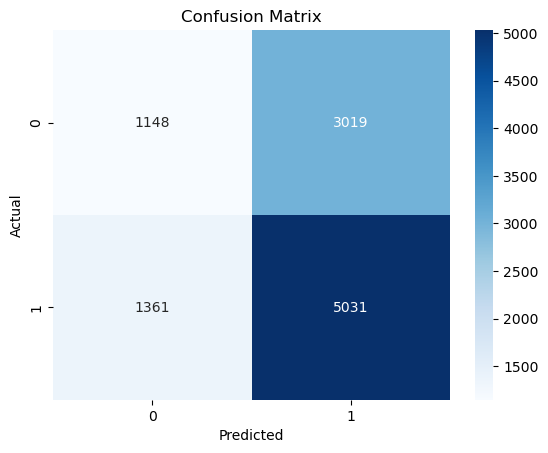

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred]

# Evaluate the model
print('Best Neural Network classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test_non_category, y_predict_non_category)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# XGBoost Hypertune

In [14]:
from hyperopt import tpe, hp, STATUS_OK
from sklearn.metrics import r2_score, mean_squared_error
import hyperopt
import sklearn
import optuna
from xgboost import XGBRegressor

def objective(trial):
    # param = {
    #     "device": "cuda",
    #     "gamma": trial.suggest_categorical("gamma", [18, 19, 20, 21, 22, 23, 24, 25]),
    #     "learning_rate": trial.suggest_categorical(
    #         "learning_rate", [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
    #     ),
    #     "colsample_bytree": trial.suggest_categorical(
    #         "colsample_bytree", [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    #     ),
    #     "colsample_bynode": trial.suggest_categorical(
    #         "colsample_bynode", [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    #     ),
    #     "n_estimators": trial.suggest_int("n_estimators", 30, 200),
    #     "max_depth": trial.suggest_categorical("max_depth", [3, 4, 5, 6, 7]),
    #     "subsample": trial.suggest_categorical("subsample", [0.5, 0.6, 0.7, 0.8, 1.0]),
    #     "random_state": 42,
    # }

    param = {
        "n_estimators": trial.suggest_int("n_estimators",50,250),
        "max_depth": trial.suggest_int("max_depth", 4,10),
        "eta": trial.suggest_float("eta",0.1, 0.5),
        # "subsample": 0.4,
        # "colsample_bytree": 0.9,
        # "random_state": 42,
        # "gamma": trial.suggest_categorical("gamma", [0, 1, 2, 3, 4, 5]),
        # "learning_rate": trial.suggest_categorical(
        #     "learning_rate", [0.1, 0.2, 0.3, 0.4, 0.5]
        # ),
        # "colsample_bynode": trial.suggest_categorical(
        #     "colsample_bynode", [0.3, 0.4, 0.5, 0.6, 0.7]
        # ),
    }

    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    y_test_non_category = [ np.argmax(t) for t in y_test ]
    y_predict_non_category = [ np.argmax(t) for t in y_pred]

    accuracy = accuracy_score(y_test_non_category,y_predict_non_category)

    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600, n_jobs=6)

[I 2024-07-22 20:12:29,089] A new study created in memory with name: no-name-ff6f3088-ef8e-430e-891d-41acf8ec6a6d
[I 2024-07-22 20:12:29,995] Trial 0 finished with value: 0.5970262335448433 and parameters: {'n_estimators': 62, 'max_depth': 5, 'eta': 0.4262693327122572}. Best is trial 0 with value: 0.5970262335448433.
[I 2024-07-22 20:12:31,320] Trial 6 finished with value: 0.6004356473150867 and parameters: {'n_estimators': 133, 'max_depth': 4, 'eta': 0.48315844170924716}. Best is trial 6 with value: 0.6004356473150867.
[I 2024-07-22 20:12:32,091] Trial 4 finished with value: 0.5729709252770149 and parameters: {'n_estimators': 129, 'max_depth': 8, 'eta': 0.44246362341267964}. Best is trial 6 with value: 0.6004356473150867.
[I 2024-07-22 20:12:32,297] Trial 5 finished with value: 0.5836726962780566 and parameters: {'n_estimators': 138, 'max_depth': 8, 'eta': 0.29988876919157426}. Best is trial 6 with value: 0.6004356473150867.
[I 2024-07-22 20:12:32,471] Trial 3 finished with value: 0.5

In [15]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 0.6177668339804906
  Params: 
    n_estimators: 53
    max_depth: 4
    eta: 0.10094823836842953


# Baseline CatBoost

In [18]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [43]:
from catboost import CatBoostClassifier

y_test_non_category = [np.argmax(t) for t in y_test]
y_train_non_category = [np.argmax(t) for t in y_train]


cat_features = .columns.tolist()
model = CatBoostClassifier(n_estimators=50, depth=5)


model.fit(X_train, y_train_non_category, verbose=0)
# Make predictions
y_pred = model.predict(
    X_test,
    prediction_type="Class",
    ntree_start=0,
    thread_count=-1,
)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.39      1.00      0.57      4167
           1       0.00      0.00      0.00      6392

    accuracy                           0.39     10559
   macro avg       0.20      0.50      0.28     10559
weighted avg       0.16      0.39      0.22     10559



/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

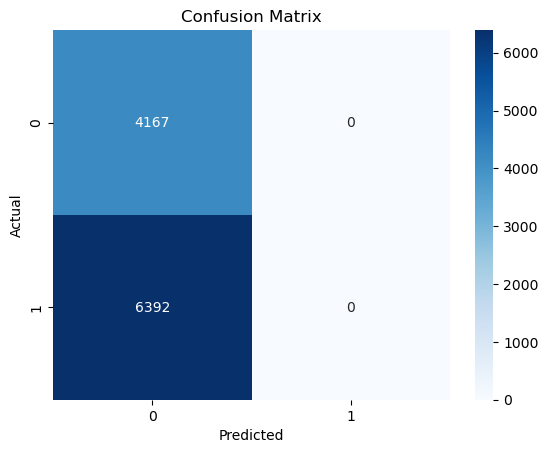

In [41]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred]

# Evaluate the model
print('Best Neural Network classification report:')
print(classification_report(y_test_non_category, y_predict_non_category))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test_non_category, y_predict_non_category)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()